# Hello everyone! I'm going to be focusing on Data Engineering, Visualization, and Prediction within the Android Permission Dataset. 

**Data Engineering:** 
1. How can we deal with the categorical variables in the features?
2. What can we do to get the most out of the descriptions and names of the apps?
3. Do we need all of these features or can we get rid of some of them to get a faster model?

**Data Visualizations:**
1. What are some patterns within the features that may give us a better idea of how to organize the data?
2. Are the classes balanced?
3. How well do our features correlate with other features?

**Data Prediction:**
1. Which model has the highest accuracy out of all the data?
2. Is there anything specific (false positive or false negative) that the model is having a hard time identifying?

Thank you for reading through this notebook and leave a like if you enjoyed it!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/android-permission-dataset/__notebook_source__.ipynb
/kaggle/input/android-permission-dataset/Android_Permission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/android-permission-dataset/Android_Permission.csv')
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.shape

(29999, 184)

# Useful Columns

A lot of these column may not be necessary, especially the ones after the first 8, lets check out the value for more of these columns to see how necessary they actually are.

To figure this out I'm gonna drop the columns which have less that 1000 "1's" because if it has less then almost all the apps have the same feature though.


In [5]:
dropper = []
for col in df.columns[10:]:
    if (df[col].value_counts()[0] == 29999 or df[col].value_counts()[1] < 1000):
        dropper.append(col)

df = df.drop(df[dropper], axis = 1)
df = df.drop('Related apps', axis = 1)

In [6]:
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Hardware controls : control vibrator (S),...,System tools : modify global system settings (D),System tools : prevent device from sleeping (D),System tools : retrieve running applications (D),System tools : set wallpaper (S),Your accounts : discover known accounts (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your personal information : read contact data (D),Your personal information : write contact data (D),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,7.0,1,0,...,0,0,0,0,0,0,1,1,1,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,3.0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df.isnull().sum()

App                                                                                  1
Package                                                                              0
Category                                                                             0
Description                                                                          3
Rating                                                                               0
Number of ratings                                                                    0
Price                                                                                0
Dangerous permissions count                                                        204
Safe permissions count                                                               0
Hardware controls : control vibrator (S)                                             0
Hardware controls : record audio (D)                                                 0
Hardware controls : take pictures and video

# Missing Values

There are very little missing values so I'm just going to drop all the rows with missing values

In [8]:
df = df.dropna()

In [9]:
df[df.columns[0:4]].head()

,App,Package,Category,Description
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn..."
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...


# Text Columns

Discluding the Category Column, the rest of these columns are text type of columns which means we need to find someway to make them into numerical types of columns. To do so I will take common patterns in malign types of apps and try and see if I can create columns that can interpret these patterns.


# Things to take in account

1. Amount of Uppercase letters in all 3 columns
2. Amount of periods in Package
3. Spelling errors in Description
4. Length of words in Description
5. Words like Free or Better in App


In [10]:
df['App_Upper'] = df['App'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Pack_Upper'] = df['Package'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Description_Upper'] = df['Description'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Pack_Periods'] = df['Package'].apply(lambda message: sum(1 for c in str(message) if '.' in c))
df['Desc_len'] = df['Description'].apply(lambda message: len(str(message).split()))

In [11]:
#from spellchecker import SpellChecker
#import re

#spell = SpellChecker()
#def misspelled(word):
#    new_word = re.sub(r'<.+?>', '', str(word))
#    miss = spell.unknown(re.findall(r"[\w']+|[.,!?;]", new_word))
#    return len(miss)

#df['Desc_Misspelled'] = np.vectorize(misspelled)(df['Description'])


In [12]:
df['App_Free'] = df['App'].str.contains('free').astype(int)

# Data Visualizations

Okay I think I'm about done doing data engineering, lets do some data visualizations now.


In [13]:
df = df.drop(['App', 'Package', 'Description'], axis = 1)

<AxesSubplot:xlabel='Class', ylabel='count'>

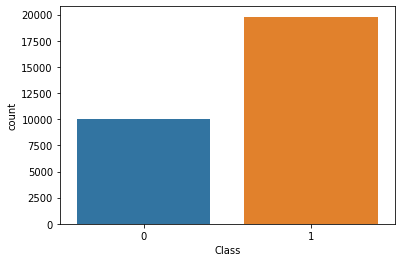

In [14]:
sns.countplot(data = df, x = 'Class')

So first thing to note is that the classes do seem to be unbalanced with a lot more scam apps than normal ones, this may cause our model to identify more apps as scams even if they aren't. To solve this issue we can stratify our data when we are splitting it.

<AxesSubplot:>

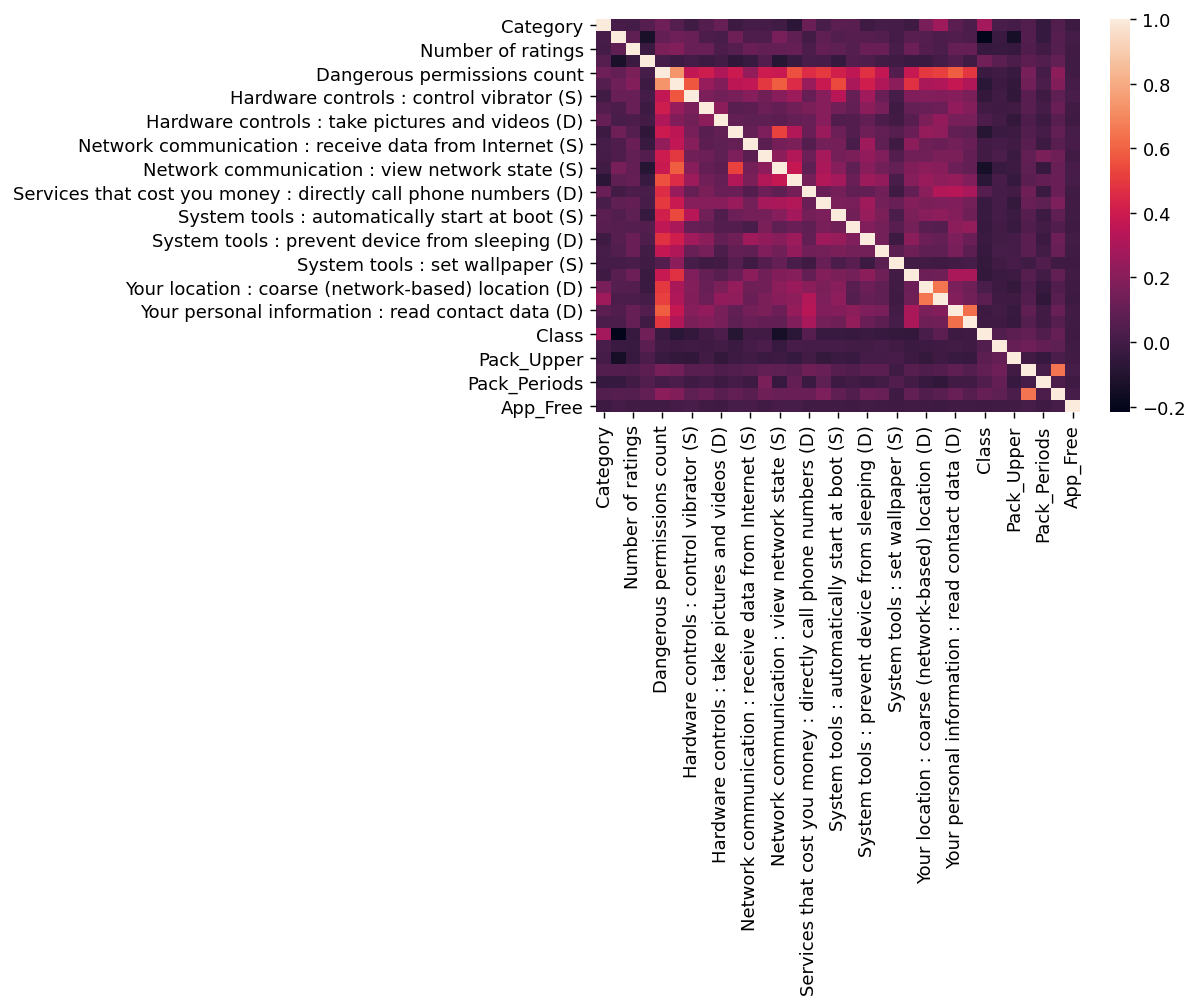

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df.copy()
df['Category'] = le.fit_transform(df['Category'])
plt.figure(dpi = 130)
sns.heatmap(df.corr())

Looking at the correlation heatmap, our objective 'Class' does not seem to be highly correlated with any other variables. In fact, the only features that really correlate with any other feature are "Dangerous Permission Count" and "Safe Permission Count"

Perhaps the correlation chart is not showng the full picture, lets look at relations between variables with other plots.

<AxesSubplot:xlabel='Rating', ylabel='Price'>

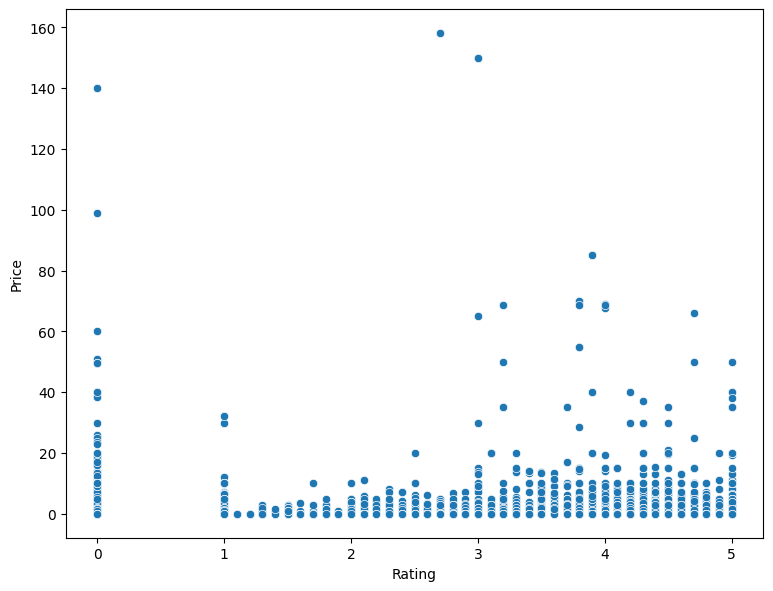

In [16]:
plt.figure(figsize = (9, 7), dpi = 100)
sns.scatterplot(data = df, x = 'Rating', y = 'Price')

Interestingly enough there seems to be very little correlation between the rating and the price of the app. One would expect that as the rating goes up, price goes down but it seems that people care much more about other variables such as gameplay rather than the price.

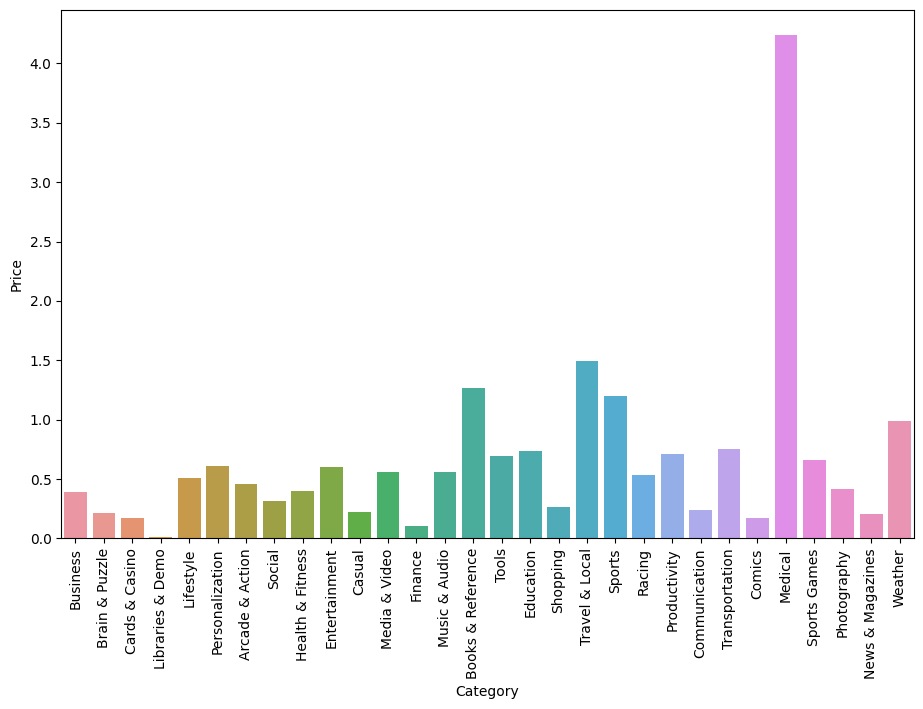

In [17]:
plt.figure(figsize = (11, 7), dpi = 100);
sns.barplot(data = df_cat, x = 'Category', y = 'Price', estimator=np.mean, ci = None)
plt.xticks(rotation = 90);

So it seems that the "Medical" Category on average has games that end up costing significantly higher than any other category, second (but not even that close) is "Travel and Local" which is kind of ironic because it means you have to pay just to download these apps before you even decide where to travel to.

I do want to explore the "Medical" Category a bit more though and see why it costs so much.

In [18]:
df_cat[(df_cat['Category'] == 'Medical') & (df_cat['Price'] > 10)][['Category', 'Price', 'Class']]

,Category,Price,Class
3731,Medical,39.95,1
7099,Medical,49.95,1
9596,Medical,59.95,1
13640,Medical,65.97,1
15534,Medical,39.99,1
17009,Medical,39.99,1
22121,Medical,65.00,1
25513,Medical,19.99,1
27009,Medical,23.67,1
29339,Medical,19.99,1


Oh lol, it seems that all the categories in the "Medical" section with prices > $10 are just scams. Which when you think about it kind of makes sense considering "Medical Apps" shouldn't cost a lot of money before you even download them.

Speaking of Prices, let's see if increases in prices lead to there being a higher result of the app being a scam.

<AxesSubplot:xlabel='Class', ylabel='Price'>

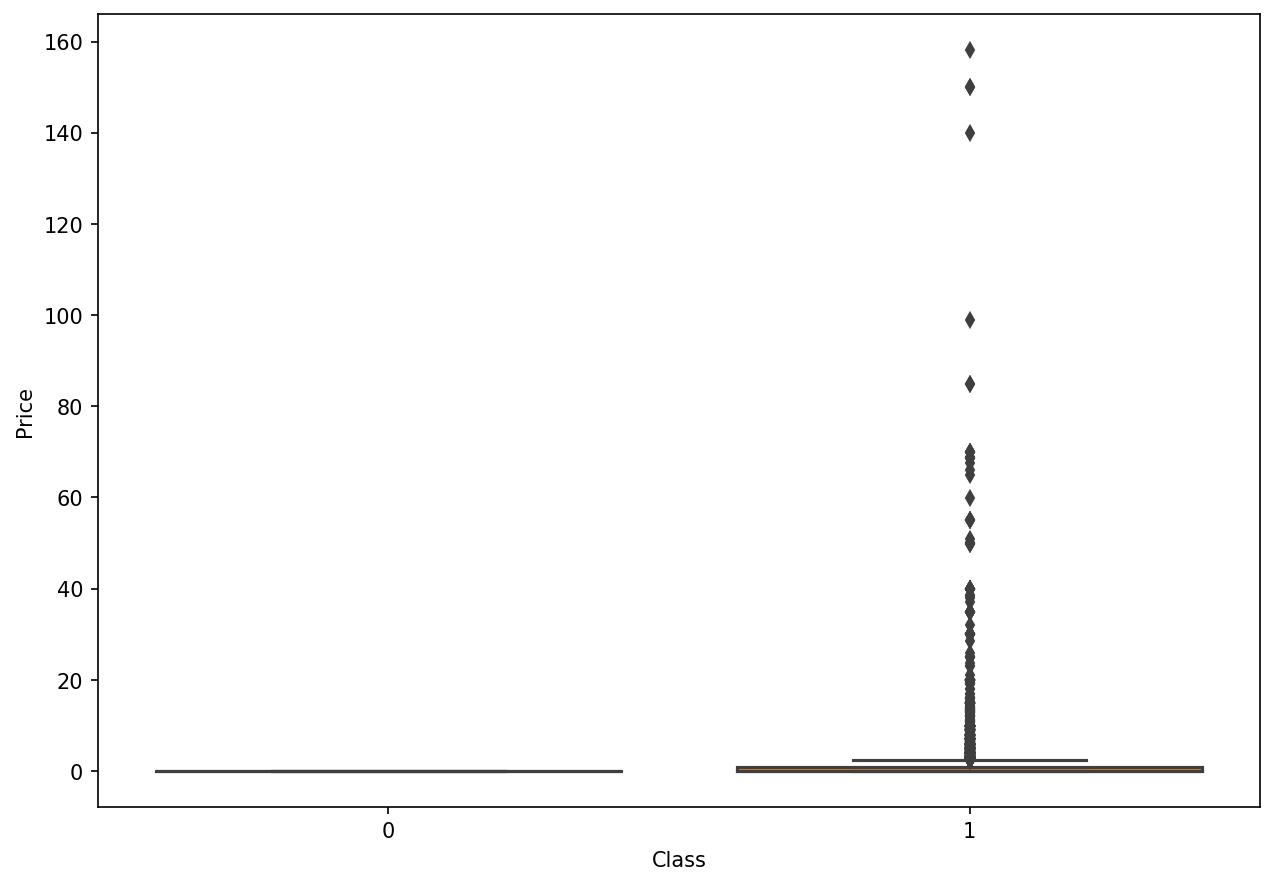

In [19]:
plt.figure(figsize=(10, 7), dpi = 150)
sns.boxplot(data = df, x = 'Class', y = 'Price')

So it seems that for the most part, most of the games, whether a scam or not, tend to have no price. However, there are many outliers suggesting that scam games do put higher prices on their apps to try and trick people into buying them.

In fact, it seems like no games that are real actually have any price to them, lets confirm this.

In [20]:
df[(df['Price'] > 0) & (df['Class'] == 0)]

,Category,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Network communication : full Internet access (D),...,Your location : fine (GPS) location (D),Your personal information : read contact data (D),Your personal information : write contact data (D),Class,App_Upper,Pack_Upper,Description_Upper,Pack_Periods,Desc_len,App_Free


Wow, so it seems that from this dataset there are no games that have a price > 0 and are not scams.

This is interesting because in terms of the model it is both good and bad in that I can create a new column called Price > 0 which will help the model understand that any price greater than 0 results in the game being a scam. At the same time though, if this model were to take in new data where, say there is a game which is not a scam has a price over $0, the model will most likely classify it as a scam. I am going to implement the column in this case because we are not taking in new data and I want to achieve the highest accuracy possible without overfitting.

In terms of real life this means that most games (on the Android) you're going to find on the appstore will most likely be free when first downloading the game and if it does have a price, it is most likely a scam.

In [21]:
df['Price > 0'] = df['Price'].apply(lambda x: 1 if x > 0 else 0)

I don't exactly understand what the "Dangerous permissions count" and "Safe permissions count" columns are so lets take a closer look at how they differ between Classes.

<AxesSubplot:xlabel='Class', ylabel='Dangerous permissions count'>

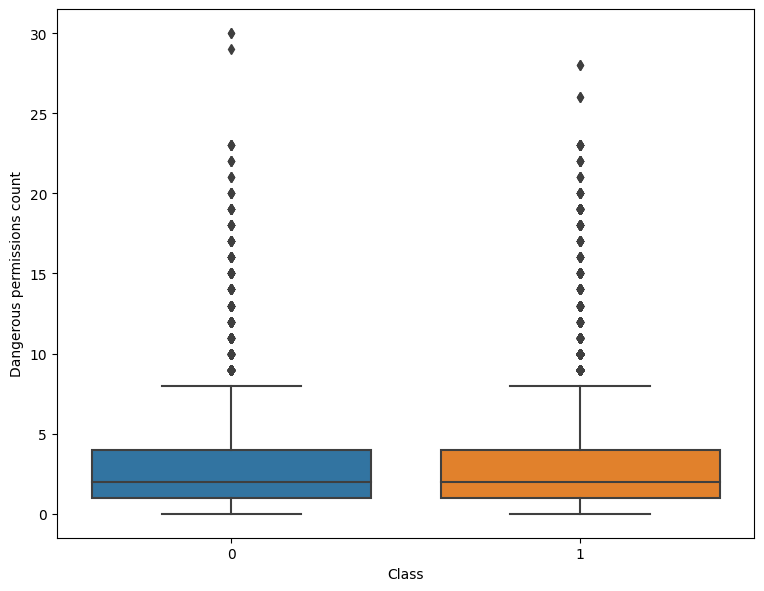

In [22]:
plt.figure(figsize=(9, 7), dpi = 100)
sns.boxplot(data = df, x = 'Class', y = 'Dangerous permissions count')

In [23]:
df[df['Dangerous permissions count'] > 10]['Class'].value_counts()

1    550
0    285
Name: Class, dtype: int64

Um okay well the Dangerous Permissions count column seems to be almost completely useless according to the boxplot considering both Classes have about the same median, upper quartile, lower quartile, and even outliers in the same place. However, when looking at the amount of "Dangerous permission count" > 10 there does seem to be a lot more scam games in there (then again there are more scam games then real games as well).

<AxesSubplot:xlabel='Class', ylabel='Safe permissions count'>

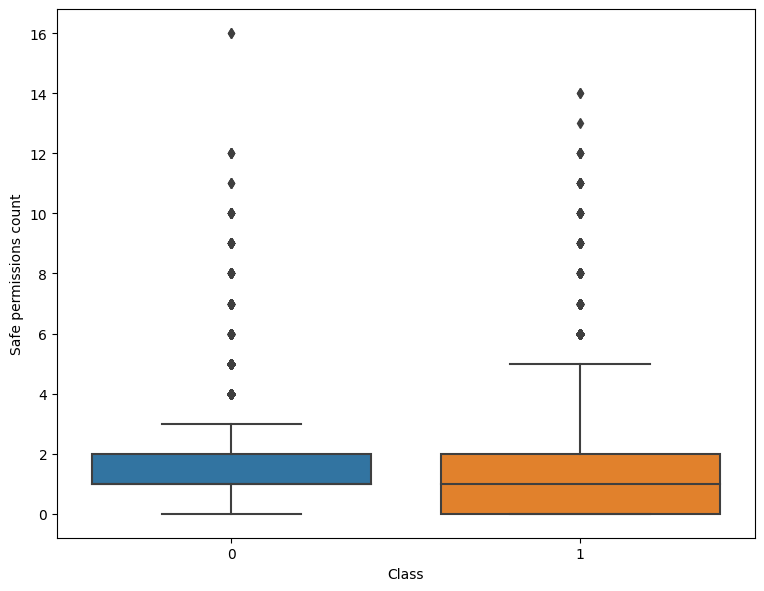

In [24]:
plt.figure(figsize=(9, 7), dpi = 100)
sns.boxplot(data = df, x = 'Class', y = 'Safe permissions count')

In [25]:
df[df['Safe permissions count'] > 5]['Class'].value_counts()

1    448
0    240
Name: Class, dtype: int64

Scam games also seem to have a higher amount of "Safe Permission Count" then real games as well which doesn't make much sense considering you wouldn't expect scams to have safe permissions but, again, it's a very vague column that I can't really understand the point of.

Okay I've decided I'm still going to keep the Permissions columns because they might end up being useful. I'm also now going to move on to doing machine learning as well. 

In [26]:
df.head()

,Category,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Network communication : full Internet access (D),...,Your personal information : read contact data (D),Your personal information : write contact data (D),Class,App_Upper,Pack_Upper,Description_Upper,Pack_Periods,Desc_len,App_Free,Price > 0
0,3,3.1,77,0.00,7.0,1,0,0,0,1,...,1,1,0,3,0,65,2,206,0,0
1,2,4.3,199,0.00,3.0,2,0,0,0,1,...,0,0,0,2,0,193,2,321,0,0
2,4,4.1,243,0.00,1.0,1,0,0,0,1,...,0,0,0,6,0,84,1,265,0,0
3,12,3.6,2589,0.00,0.0,0,0,0,0,0,...,0,0,0,4,0,9,4,37,0,0
4,13,0.0,0,5.99,1.0,0,0,0,0,1,...,0,0,1,2,5,7,2,42,0,1


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state = 101)

In [28]:
ct = ColumnTransformer([('st', StandardScaler(), ['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count'])], remainder='passthrough')
ct.fit(X_train)
X_train_sc = ct.transform(X_train)
X_test_sc = ct.transform(X_test)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [30]:
rc = RidgeClassifier(alpha = 0, class_weight=None, solver = 'cholesky')
rc.fit(X_train_sc, y_train)

RidgeClassifier(alpha=0, solver='cholesky')

In [31]:
y_pred_rc = rc.predict(X_test_sc)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [33]:
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52      1999
           1       0.76      0.84      0.79      3960

    accuracy                           0.71      5959
   macro avg       0.67      0.65      0.66      5959
weighted avg       0.70      0.71      0.70      5959



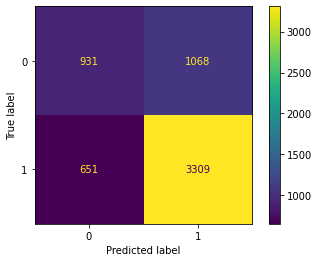

In [34]:
plot_confusion_matrix(rc, X_test_sc, y_test)

In [35]:
ls = LinearSVC(dual = False, C = 0.6)
ls.fit(X_train_sc, y_train)

LinearSVC(C=0.6, dual=False)

In [36]:
y_pred_ls = ls.predict(X_test_sc)

In [37]:
print(classification_report(y_test, y_pred_ls))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      1999
           1       0.78      0.80      0.79      3960

    accuracy                           0.72      5959
   macro avg       0.68      0.68      0.68      5959
weighted avg       0.71      0.72      0.72      5959



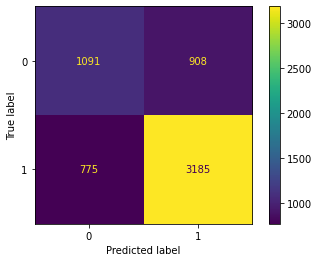

In [38]:
plot_confusion_matrix(ls, X_test_sc, y_test)

In [39]:
rc = RandomForestClassifier(n_estimators=200)
rc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
y_pred_rc = rc.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1999
           1       0.86      0.85      0.85      3960

    accuracy                           0.81      5959
   macro avg       0.78      0.79      0.79      5959
weighted avg       0.81      0.81      0.81      5959



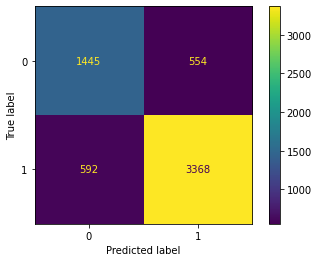

In [42]:
plot_confusion_matrix(rc, X_test, y_test)

In [43]:
gc = GradientBoostingClassifier(max_depth = 4, n_estimators = 200)
gc.fit(X_train, y_train)
y_pred_gc = gc.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_gc))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1999
           1       0.87      0.85      0.86      3960

    accuracy                           0.82      5959
   macro avg       0.79      0.80      0.80      5959
weighted avg       0.82      0.82      0.82      5959



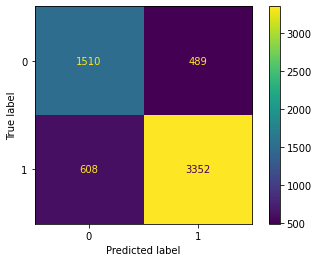

In [45]:
plot_confusion_matrix(gc, X_test, y_test)

So all in all it seems that the Gradient Boosting algorithm did best with an accuracy of 82% at identifying malicious apps. Thank you for going through this notebook and have a great day!